In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib.pyplot as plt

path = '/media/robert/Data_Storage/VSim/Matched-Accelerating-Gradient/Convergence_Tests/10e17PlasmaDensity/DriveOnly1024X2048/'
simName = 'AccelGradient'

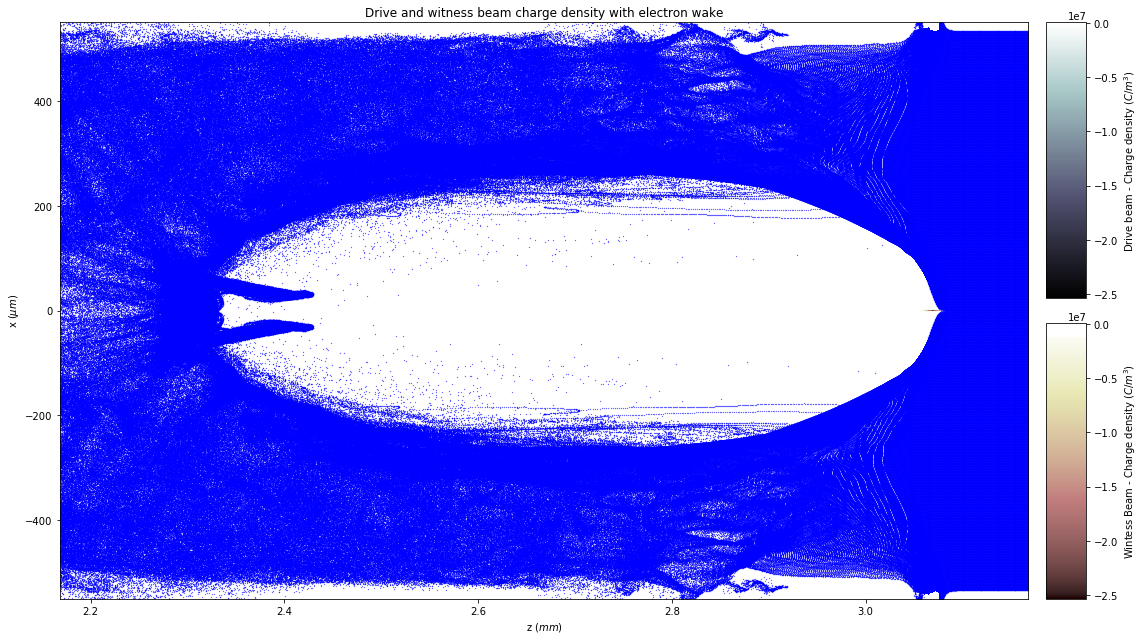

In [3]:
params = {'drive' : 'rhoDrive',
          'witness' : 'rhoDrive',
          'plasma' : 'electrons',
          'dumpInd' : 6,
          'path' : path,
          'simName' : simName,
          'zoom' : 4.0,
          'alphaCutoff' : .05
          }
plot.drive_witness_density(params)

In [3]:
params = {'species' : 'WitnessBeam',
          'path' : path,
          'simName' : simName,
          'Nt' : 10,
          'mass' : 0.511e-3
          }
d, e = plot.emittance_energy(params)
params['dumpInd'] = 7
params['bins'] = 40
plot.energy_distribution(params)
for i in range(len(d)):
    print('(d, e): (', d[i], ',', e[i], ')')
pFile = plot.get_filename(path, simName, params['species'], params['dumpInd'])
pData = load.get_species_data(pFile, params['species'])
weights = analyze.get_weights(pData)
energy = analyze.get_ptc_energy(pData, params['mass'])
average = np.average(energy, weights=weights)
var = np.average((energy-average)**2, weights=weights)
std = np.sqrt(var)
gradient = (e[7]-e[2]) / (d[7]-d[2]) *100
print('grad: ', gradient, 'GeV/m')
print('std: ', std, 'GeV')

OSError: Unable to open file (Unable to open file: name = '/media/robert/data_storage/vsim/matched-accelerating-gradient/convergence_tests/10e17plasmadensity/driveonly1024x2048/accelgradient_witnessbeam_0.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)